In [2]:
import numpy as np
import pandas as pd

## Load dataset

SMS Spam Collection Dataset: <https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset>


In [3]:
df = pd.read_csv('./data/spam.csv', encoding='latin-1')

display(df.shape)
display(df.head())
df.info()

(5572, 5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Clean data


### Transform columns


In [4]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df = df.rename(columns={'v1': 'target', 'v2': 'text'})

display(df.shape)
display(df.head())

(5572, 2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Encode labels

In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df['target'])
display(encoder.classes_)

df['target'] = encoder.transform(df['target'])
df.head()

array(['ham', 'spam'], dtype=object)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Check for null values


In [6]:
display(df.isnull().sum())

if df.isnull().to_numpy().any():
    df = df.dropna()
    display('Removed rows with missing values.')

display(df.isnull().sum())

target    0
text      0
dtype: int64

target    0
text      0
dtype: int64

### Remove duplicates


In [7]:
display(df.duplicated().sum())

if df.duplicated().any():
    df = df.drop_duplicates()
    display('Removed duplicated rows.')

display(df.duplicated().sum())

403

'Removed duplicated rows.'

0

## Perform EDA (Exploratory Data Analysis)


In [8]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


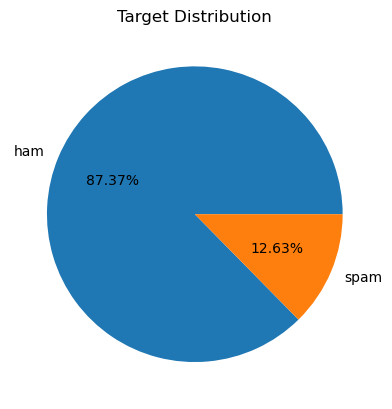

In [9]:
import matplotlib.pyplot as plt

plt.pie(
    df['target'].value_counts(),
    labels=encoder.classes_.tolist(),
    autopct='%0.2f%%'
)
plt.title('Target Distribution')
plt.show()

### NLTK

#### Install package

In [10]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


#### Download *Punkt Sentence Tokenizer*

The Punkt Sentence Tokenizer is used to segment text into sentences, enabling more detailed analysis of text structure.

In [11]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ushka/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Feature engineering

#### Add features

In [12]:
df['characters_count'] = df['text'].apply(len)
df['words_count'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['sentences_count'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,characters_count,words_count,sentences_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [13]:
def get_hams(df):
    return df[df['target'] == 0]


def get_spams(df):
    return df[df['target'] == 1]

#### Hams & Spams

In [14]:
display(df[['characters_count', 'words_count', 'sentences_count']].describe())

,characters_count,words_count,sentences_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


#### Hams

In [15]:
display(
    get_hams(df)[
        [
            'characters_count',
            'words_count',
            'sentences_count'
        ]
    ].describe()
)

,characters_count,words_count,sentences_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


#### Spams

In [16]:
display(
    get_spams(df)[
        [
            'characters_count',
            'words_count',
            'sentences_count'
        ]
    ].describe()
)

,characters_count,words_count,sentences_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


### Plots

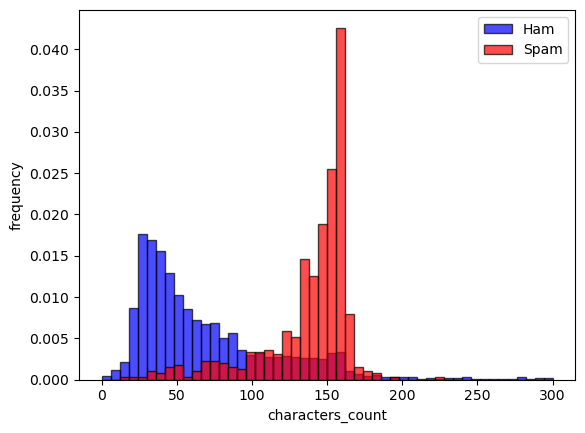

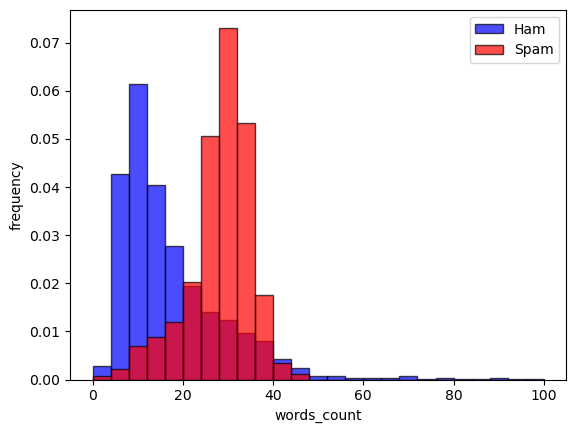

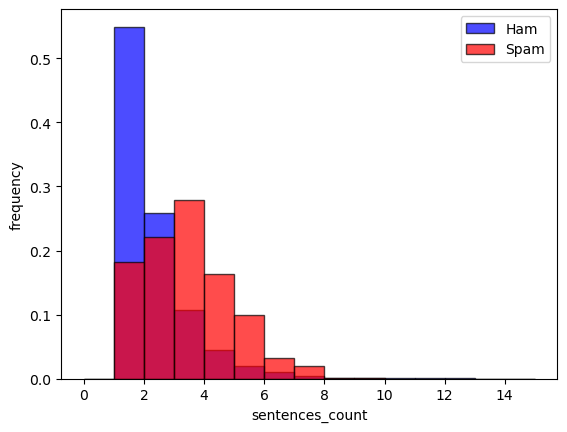

In [17]:
cols = ['characters_count', 'words_count', 'sentences_count']
bins = [50, 25, 15]
xlims = [(0, 300), (0, 100), (0, 15)]

for col, bin, xlim in zip(cols, bins, xlims):
    plt.hist(
        get_hams(df)[col],
        bins=bin,
        alpha=0.7,
        label='Ham',
        color='blue',
        density=True,
        edgecolor='black',
        range=xlim
    )
    plt.hist(
        get_spams(df)[col],
        bins=bin,
        alpha=0.7,
        label='Spam',
        color='red',
        density=True,
        edgecolor='black',
        range=xlim
    )
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.legend()
    plt.show()

In [18]:
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

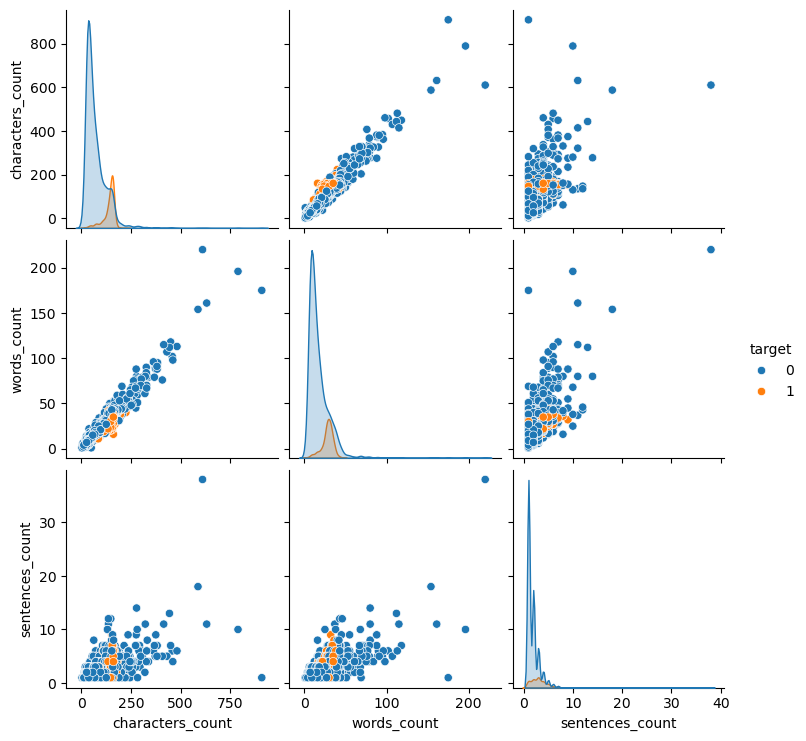

In [19]:
sns.pairplot(df, hue='target')
plt.show()

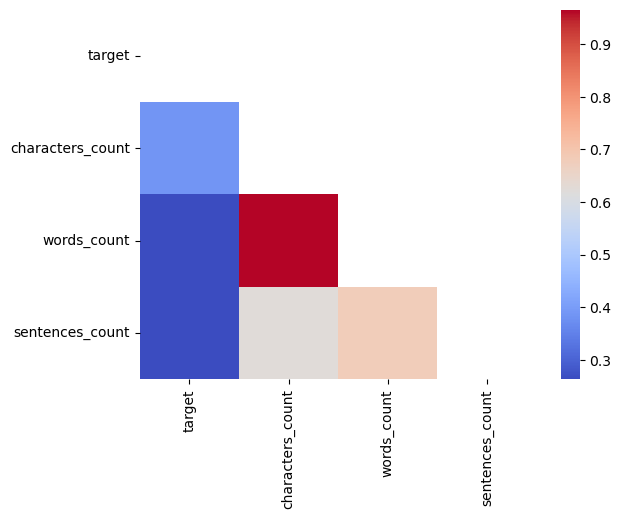

In [20]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr,
    cmap='coolwarm',
    mask=mask,
)
plt.show()

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['characters_count_scaled'] = scaler.fit_transform(df[['characters_count']])
df['words_count_scaled'] = scaler.fit_transform(df[['words_count']])
df['sentences_count_scaled'] = scaler.fit_transform(df[['sentences_count']])

# Data preprocessing


### Install Stopwords

The NLTK stopwords package is used to filter out common words (e.g., "the", "is", "and") from text, facilitating more focused analysis of content.

In [22]:
import string
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ushka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Stemming is the process of reducing words to their root or base form, often by removing suffixes and prefixes, to normalize variations of words for analysis or indexing in natural language processing tasks.

In [23]:
stemmer = PorterStemmer()

### Text transformation

1. Lowercase
1. Tokenize
1. Remove special characters
1. Remove stopwords and punctuation
1. Stemming


In [24]:
def text_transform(text: str) -> str:
    result = text.lower()
    result = nltk.word_tokenize(result)

    temp = []
    for word in result:
        if word.isalnum():
            temp.append(word)
    result = temp

    temp = []
    for word in result:
        if word not in nltk.corpus.stopwords.words('english') and word not in string.punctuation:
            temp.append(word)
    result = temp

    temp = []
    for word in result:
        temp.append(stemmer.stem(word))
    result = temp

    return " ".join(result)

In [25]:
example_text = df['text'][5]

print("Original =", example_text)
print("Transformed =",  text_transform(example_text))

Original = FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Transformed = freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv


In [26]:
df['text_transformed'] = df['text'].apply(text_transform)
df[['text', 'text_transformed']].head()

,text,text_transformed
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


### Plot most popular words

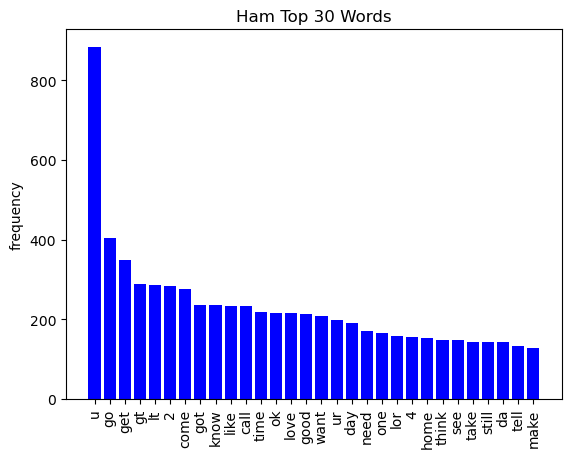

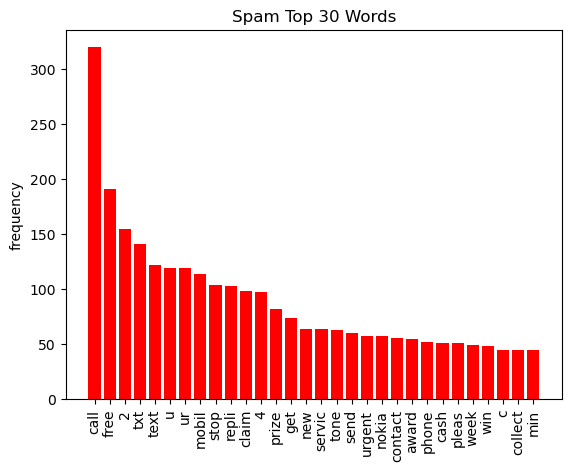

In [27]:
from collections import Counter

ham_corpus = get_hams(df)['text_transformed'].str.split(
    expand=True
).stack()
spam_corpus = get_spams(df)['text_transformed'].str.split(
    expand=True
).stack()

n = 30
ham_counter = Counter(ham_corpus)
spam_counter = Counter(spam_corpus)

plt.bar(
    *zip(*ham_counter.most_common(n)),
    color='blue'
)
plt.xticks(rotation=90)
plt.ylabel('frequency')
plt.title(f'Ham Top {n} Words')
plt.show()

plt.bar(
    *zip(*spam_counter.most_common(n)),
    color='red'
)
plt.xticks(rotation=90)
plt.ylabel('frequency')
plt.title(f'Spam Top {n} Words')
plt.show()

## Data Augmentation

In [28]:
import random
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/ushka/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Synonim Replecement

In [29]:
def synonym_replacement(words, n):
    new_words = words.copy()
    random_word_list = list(set(
        [word for word in words if word not in nltk.corpus.stopwords.words('english')]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(synonyms)
            new_words = [synonym if word ==
                         random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break

    return new_words


def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return list(set(synonyms))

#### Random words inserting

In [30]:
def random_insertion(words, n):
    new_words = words.copy()
    for _ in range(n):
        add_word(new_words)
    return new_words


def add_word(new_words):
    synonyms = []
    counter = 0
    while len(synonyms) < 1:
        random_word = new_words[random.randint(0, len(new_words)-1)]
        synonyms = get_synonyms(random_word)
        counter += 1
        if counter >= 10:
            return
    random_synonym = synonyms[0]
    random_idx = random.randint(0, len(new_words)-1)
    new_words.insert(random_idx, random_synonym)

#### Function to randomly swap words

In [31]:
def random_swap(words, n):
    new_words = words.copy()
    for _ in range(n):
        new_words = swap_word(new_words)
    return new_words


def swap_word(new_words):
    random_idx_1 = random.randint(0, len(new_words)-1)
    random_idx_2 = random_idx_1
    counter = 0
    while random_idx_2 == random_idx_1:
        random_idx_2 = random.randint(0, len(new_words)-1)
        counter += 1
        if counter > 3:
            return new_words
    new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1]
    return new_words

#### Random Deletion 

In [32]:
def random_deletion(words, p):
    if len(words) == 1:
        return words

    new_words = []
    for word in words:
        r = random.uniform(0, 1)
        if r > p:
            new_words.append(word)

    if len(new_words) == 0:
        rand_int = random.randint(0, len(words)-1)
        return [words[rand_int]]

    return new_words

#### Function to augment a sentence

In [33]:
def augment_sentence(sentence):
    words = word_tokenize(sentence)
    aug_methods = [synonym_replacement,
                   random_insertion, random_swap, random_deletion]
    random.shuffle(aug_methods)
    for method in aug_methods:
        if method == random_deletion:
            words = method(words, p=0.1)
        else:
            words = method(words, n=1)
    return ' '.join(words)

In [34]:
df['text_augmented'] = df['text'].apply(augment_sentence)
display(df[['text', 'text_augmented']].head())

,text,text_augmented
0,"Go until jurong point, crazy.. Available only ...","only until jurong point , crazy Go in bugis n ..."
1,Ok lar... Joking wif u oni...,lar jest Joking ... wif u ONI ...
2,Free entry in 2 a wkly comp to win FA Cup fina...,entry two in a wkly comp to win FA final tkts ...
3,U dun say so early hor... U c already then say...,U then so say dun early hor U c already then s...
4,"Nah I don't think he goes to usf, he lives aro...","do n't cerebrate he goes to usf , lives he kno..."


## Data preparation

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [36]:
RS = 42

### Train/test split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text_transformed'],
    df['target'],
    test_size=0.2,
    random_state=RS
)

### CountVectorizer vs TfidfVectorizer

TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

<https://www.linkedin.com/pulse/count-vectorizers-vs-tfidf-natural-language-processing-sheel-saket/>


### Vectorizing

Vectorizing is the process of converting text or categorical data into numerical vectors that machine learning models can understand and process.

In [38]:
tfidf = TfidfVectorizer(max_features=2000)
tfidf.fit(X_train)
vocab = tfidf.vocabulary_

display(vocab)

{'exact': 629,
 'intent': 901,
 'one': 1257,
 'ok': 1250,
 'next': 1202,
 'time': 1782,
 'free': 709,
 'video': 1872,
 'camera': 368,
 'phone': 1329,
 'half': 784,
 'price': 1407,
 'line': 1009,
 'rental': 1483,
 '12': 15,
 'mth': 1159,
 '500': 50,
 'ntwk': 1228,
 'min': 1105,
 '100': 11,
 'txt': 1829,
 'call': 360,
 'mobileupd8': 1125,
 'tick': 1778,
 'could': 468,
 'die': 536,
 'know': 963,
 'pout': 1386,
 'stomp': 1680,
 'feet': 667,
 'need': 1191,
 'tone': 1794,
 'club': 429,
 'sub': 1695,
 'expir': 641,
 'repli': 1485,
 'mono': 1137,
 'poli': 1366,
 'weekli': 1914,
 '150p': 19,
 'per': 1318,
 'week': 1912,
 'stop': 1681,
 'msg': 1156,
 'pleas': 1352,
 'text': 1752,
 'anymor': 162,
 'noth': 1224,
 'els': 599,
 'say': 1537,
 'pl': 1345,
 'find': 678,
 'aunt': 220,
 'bruce': 328,
 'amp': 147,
 'mom': 1131,
 'car': 376,
 'ca': 351,
 'park': 1301,
 'long': 1028,
 'stori': 1683,
 'miss': 1112,
 'allah': 132,
 'tell': 1746,
 'claim': 421,
 'prize': 1411,
 'enter': 610,
 'ur': 1853,
 'mob

In [39]:
X_train = tfidf.transform(X_train).toarray()   # type: ignore
X_test = tfidf.transform(X_test).toarray()  # type: ignore

### Scaling

With TF-IDF vectorization, scaling isn't typically needed because TF-IDF (Term Frequency-Inverse Document Frequency) already normalizes the importance of each term based on its frequency across documents, ensuring that all features are on a comparable scale for machine learning models.

<https://stackoverflow.com/a/36678046/12197778>


In [40]:
# scaler = MinMaxScaler()
# scaler.fit(X_train)

In [41]:
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

### Scoring

#### Scores

- $TP$ - True positive (spam classified as spam)
- $TN$ - True negative (ham classified as ham)
- $FP$ - False positive (ham classified as spam)
- $FN$ - False negative (spam classified as ham)

#### Metrics

- Accuracy = $(TP + TN) / (TP + TN + FP + FN)$
- Precision = $TP / (TP + FP)$
  - How many predicted positives are actually positive
- Recall = $TP / (TP + FN)$
  - How many actual positives were detected

#### Confusion matrix

|                     | Predicted Negative | Predicted Positive |
| ------------------- | ------------------ | ------------------ |
| **Actual Negative** | TN                 | FP                 |
| **Actual Positive** | FN                 | TP                 |


In [42]:
def calc_scores(clf, X_test, y_test):
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return acc, prec, rec, cm


def print_scores(acc, prec, rec, cm):
    output = f"Accuracy: {acc}\n"
    output += f"Precision: {prec}\n"
    output += f"Recall: {rec}\n"
    output += "Confusion Matrix:\n"
    output += f"{cm}\n"

    print(output)


def create_perf_df(scores_dict):
    perf_df = pd.DataFrame(
        scores_dict,
        index=[
            'accuracy',
            'precision',
            'recall',
            'confusion_matrix'
        ]
    )
    perf_df = perf_df.drop('confusion_matrix')
    perf_df = perf_df.sort_values(by='precision', axis=1, ascending=False)
    perf_df = perf_df.T
    return perf_df

## Model building

### Test Naive Bayes models

In [43]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [44]:
nb_clfs = {
    'Gaussian Naive Bayes': GaussianNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Bernoulli Naive Bayes': BernoulliNB()
}


nb_scores_dict = {}
for name, clf in nb_clfs.items():
    clf.fit(X_train, y_train)
    scores = calc_scores(clf, X_test, y_test)
    nb_scores_dict[name] = scores

In [45]:
nb_perf_df = create_perf_df(nb_scores_dict)
display(nb_perf_df)

,accuracy,precision,recall
Multinomial Naive Bayes,0.973888,0.983607,0.827586
Bernoulli Naive Bayes,0.974855,0.954198,0.862069
Gaussian Naive Bayes,0.823985,0.436426,0.875862


### Find best performing models

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [47]:
clfs = {
    'LR': LogisticRegression(solver='liblinear', penalty='l1', random_state=RS),
    'SVC': SVC(kernel='sigmoid', gamma=1.0, random_state=RS),
    'MNB': MultinomialNB(),
    'DTC': DecisionTreeClassifier(max_depth=5, random_state=RS),
    'KNC': KNeighborsClassifier(),
    'RFC': RandomForestClassifier(n_estimators=50, random_state=RS),
    'ABC': AdaBoostClassifier(n_estimators=50, random_state=RS),
    'BC': BaggingClassifier(n_estimators=50, random_state=RS),
    'ETC': ExtraTreesClassifier(n_estimators=50, random_state=RS),
    'GBC': GradientBoostingClassifier(n_estimators=50, random_state=RS),
    'XGBC': XGBClassifier(n_estimators=50, random_state=RS)
}

In [48]:
clfs_scores_dict = {}

for name, clf in clfs.items():
    clf.fit(X_train, y_train)
    scores = calc_scores(clf, X_test, y_test)
    clfs_scores_dict[name] = scores

In [49]:
clfs_perf_df = create_perf_df(clfs_scores_dict)
display(clfs_perf_df)

,accuracy,precision,recall
KNC,0.910058,1.0,0.358621
RFC,0.970986,0.991453,0.8
MNB,0.973888,0.983607,0.827586
ETC,0.976789,0.961832,0.868966
SVC,0.978723,0.955556,0.889655
GBC,0.945841,0.949495,0.648276
XGBC,0.965184,0.936,0.806897
BC,0.964217,0.897059,0.841379
LR,0.954545,0.876923,0.786207
ABC,0.951644,0.868217,0.772414


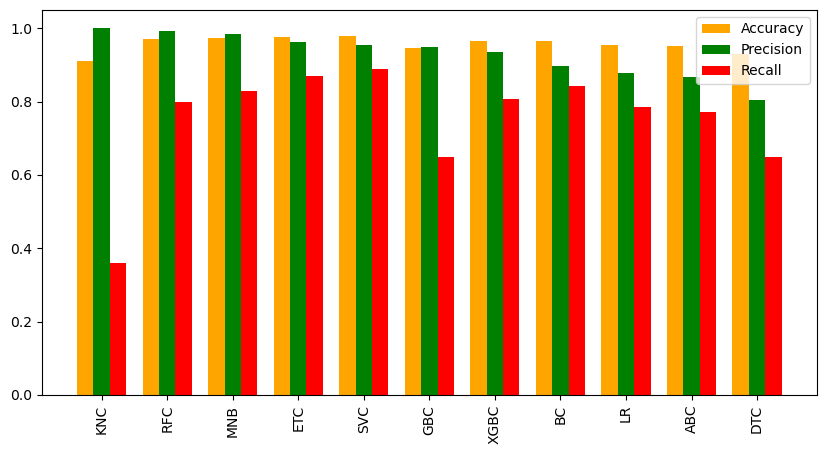

In [50]:
bar_width = 0.25

r1 = np.arange(len(clfs_perf_df)) - bar_width
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10, 5))
plt.bar(
    r1,
    clfs_perf_df['accuracy'],
    label='Accuracy',
    width=bar_width,
    color='orange'
)
plt.bar(
    r2,
    clfs_perf_df['precision'],
    label='Precision',
    width=bar_width,
    color='green'
)
plt.bar(
    r3,
    clfs_perf_df['recall'],
    label='Recall',
    width=bar_width,
    color='red'
)
plt.xticks(
    rotation=90,
    ticks=range(len(clfs_perf_df)),
    labels=clfs_perf_df.index  # type: ignore
)
plt.legend()
plt.show()

### **Best performing models**

In [51]:
clfs_final = {
    'RFC': clfs['RFC'],
    'MNB': clfs['MNB'],
    'ETC': clfs['ETC'],
    'SVC': clfs['SVC'],
}

## Models optimization

### Find best vectorizer

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [53]:
# from sklearn.base import TransformerMixin

# class ToArrayTransformer(TransformerMixin):
#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         return X.toarray()

# scalers_2 = [
#     None,
#     MinMaxScaler()
# ]

In [54]:
X_train_vectorizer, X_test_vectorizer, y_train_vectorizer, y_test_vectorizer = train_test_split(
    df['text_transformed'],
    df['target'],
    test_size=0.2,
    random_state=RS
)

param_grid_vectorizer = [
    {
        'vectorizer': [TfidfVectorizer(max_features=1000)],
        'classifier': list(clfs_final.values())
    },
    {
        'vectorizer': [TfidfVectorizer(max_features=2000)],
        'classifier':  list(clfs_final.values())
    },
    {
        'vectorizer': [TfidfVectorizer(max_features=3000)],
        'classifier':   list(clfs_final.values())
    }
]

pipeline_vectorizer = Pipeline(
    [
        ('vectorizer', None),
        ('classifier', None)
    ],
    memory='cachedir'
)

grid_search_vectorizer = GridSearchCV(
    pipeline_vectorizer,
    param_grid_vectorizer,
    cv=5,
    scoring='precision'
)
grid_search_vectorizer.fit(X_train_vectorizer, y_train_vectorizer)

GridSearchCV(cv=5,
             estimator=Pipeline(memory='cachedir',
                                steps=[('vectorizer', None),
                                       ('classifier', None)]),
             param_grid=[{'classifier': [RandomForestClassifier(n_estimators=50,
                                                                random_state=42),
                                         MultinomialNB(),
                                         ExtraTreesClassifier(n_estimators=50,
                                                              random_state=42),
                                         SVC(gamma=1.0, kernel='sigmoid',
                                             random_state=42)],
                          'vectorizer': [TfidfVectorizer(max_features=1...
                                         SVC(gamma=1.0, kernel='sigmoid',
                                             random_state=42)],
                          'vectorizer': [TfidfVectorizer(max_features=2000)]},
                         {'classifier': [RandomForestClassifier(n_estimators=50,
                                                                random_state=42),
                                         MultinomialNB(),
                                         ExtraTreesClassifier(n_estimators=50,
                                                              random_state=42),
                                         SVC(gamma=1.0, kernel='sigmoid',
                                             random_state=42)],
                          'vectorizer': [TfidfVectorizer(max_features=3000)]}],
             scoring='precision')

In [55]:
results_vectorizer = pd.DataFrame(grid_search_vectorizer.cv_results_)
results_vectorizer = results_vectorizer.sort_values('rank_test_score')
results_short_vectorizer = results_vectorizer.drop(
    columns=[
        'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'params'
    ]
)
display(results_short_vectorizer)

,param_classifier,param_vectorizer,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,MultinomialNB(),TfidfVectorizer(max_features=2000),0.988235,0.986486,1.000000,1.000000,1.000000,0.994944,0.006217,1
9,MultinomialNB(),TfidfVectorizer(max_features=3000),0.987013,0.985507,1.000000,1.000000,1.000000,0.994504,0.006748,2
8,"(DecisionTreeClassifier(max_features='sqrt', r...",TfidfVectorizer(max_features=3000),0.988506,0.974026,1.000000,1.000000,0.986111,0.989729,0.009718,3
4,"(DecisionTreeClassifier(max_features='sqrt', r...",TfidfVectorizer(max_features=2000),0.988235,0.987805,1.000000,0.987500,0.972603,0.987229,0.008700,4
1,MultinomialNB(),TfidfVectorizer(max_features=1000),0.988506,0.961538,0.978723,0.988372,1.000000,0.983428,0.012854,5
6,"(ExtraTreeClassifier(random_state=1608637542),...",TfidfVectorizer(max_features=2000),0.977528,0.963415,0.977273,1.000000,0.946667,0.972976,0.017624,6
7,"SVC(gamma=1.0, kernel='sigmoid', random_state=42)",TfidfVectorizer(max_features=2000),0.968421,0.975610,0.978495,0.955556,0.985714,0.972759,0.010234,7
0,"(DecisionTreeClassifier(max_features='sqrt', r...",TfidfVectorizer(max_features=1000),0.943820,0.987952,0.988636,0.975610,0.960000,0.971204,0.017200,8
10,"(ExtraTreeClassifier(random_state=1608637542),...",TfidfVectorizer(max_features=3000),0.988636,0.952941,1.000000,0.976744,0.936709,0.971006,0.023182,9
11,"SVC(gamma=1.0, kernel='sigmoid', random_state=42)",TfidfVectorizer(max_features=3000),0.958333,0.976190,0.989130,0.956522,0.973333,0.970702,0.012089,10


In [56]:
vectorizer_final = TfidfVectorizer(max_features=2000)

### Additional features

In [57]:
def get_standard_scores():
    X_train, X_test, y_train, y_test = train_test_split(
        df['text_transformed'],
        df['target'],
        test_size=0.2,
        random_state=RS
    )

    vectorizer_final.fit(X_train)

    X_train = vectorizer_final.transform(
        X_train
    ).toarray()  # type: ignore
    X_test = vectorizer_final.transform(
        X_test
    ).toarray()  # type: ignore

    scores = {}
    for name, clf in clfs_final.items():
        clf.fit(X_train, y_train)
        scores[name] = calc_scores(clf, X_test, y_test)

    scores_df = create_perf_df(scores)
    return scores_df

In [58]:
standard_perf_df = get_standard_scores()
standard_perf_df = standard_perf_df.sort_index()

#### Check text augmentation

In [59]:
def get_text_augmented_scores():
    X_train, X_test, y_train, y_test = train_test_split(
        df['text_augmented'],
        df['target'],
        test_size=0.2,
        random_state=RS
    )

    vectorizer_final.fit(X_train)

    X_train = vectorizer_final.transform(
        X_train
    ).toarray()  # type: ignore
    X_test = vectorizer_final.transform(
        X_test
    ).toarray()  # type: ignore

    scores = {}
    for name, clf in clfs_final.items():
        clf.fit(X_train, y_train)
        scores[name] = calc_scores(clf, X_test, y_test)

    scores_df = create_perf_df(scores)
    return scores_df

In [60]:
display(standard_perf_df)

,accuracy,precision,recall
ETC,0.976789,0.961832,0.868966
MNB,0.973888,0.983607,0.827586
RFC,0.970986,0.991453,0.8
SVC,0.978723,0.955556,0.889655


In [61]:
text_augmented_perf_df = get_text_augmented_scores()
text_augmented_perf_df = text_augmented_perf_df.sort_index()

display(text_augmented_perf_df)

,accuracy,precision,recall
ETC,0.981625,0.977273,0.889655
MNB,0.972921,1.0,0.806897
RFC,0.976789,0.984,0.848276
SVC,0.98646,0.985185,0.917241


#### Check characters count

In [62]:
def get_character_count_scores():
    X_train, X_test, y_train, y_test = train_test_split(
        np.column_stack((
            df['text_transformed'],
            df['characters_count_scaled'],
        )),
        df['target'],
        test_size=0.2,
        random_state=RS
    )

    vectorizer_final.fit(X_train[:, 0])

    X_train_a = vectorizer_final.transform(
        X_train[:, 0]).toarray()  # type: ignore
    X_test_a = vectorizer_final.transform(
        X_test[:, 0]).toarray()  # type: ignore
    X_train_b = X_train[:, 1:2].reshape(-1, 1)
    X_test_b = X_test[:, 1:2].reshape(-1, 1)

    X_train = np.concatenate((X_train_a, X_train_b), axis=1)
    X_test = np.concatenate((X_test_a, X_test_b), axis=1)

    scores = {}
    for name, clf in clfs_final.items():
        clf.fit(X_train, y_train)
        scores[name] = calc_scores(clf, X_test, y_test)

    scores_df = create_perf_df(scores)
    return scores_df

In [63]:
display(standard_perf_df)

,accuracy,precision,recall
ETC,0.976789,0.961832,0.868966
MNB,0.973888,0.983607,0.827586
RFC,0.970986,0.991453,0.8
SVC,0.978723,0.955556,0.889655


In [64]:
character_count_perf_df = get_character_count_scores()
character_count_perf_df = character_count_perf_df.sort_index()

display(character_count_perf_df)

,accuracy,precision,recall
ETC,0.979691,0.962687,0.889655
MNB,0.973888,0.983607,0.827586
RFC,0.972921,0.983471,0.82069
SVC,0.979691,0.955882,0.896552


## Models hyperparameters tuning


In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [112]:
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    df['text_augmented'],
    df['target'],
    test_size=0.2,
    random_state=RS
)

vectorizer_final.fit(X_train_final)

X_train_final = vectorizer_final.transform(X_train_final)
X_test_final = vectorizer_final.transform(X_test_final)

In [99]:
param_grid_mnb = {
    'alpha': np.linspace(0.01, 1.0, 100),
    'fit_prior': [True, False],
}

param_search_mnb = GridSearchCV(
    MultinomialNB(),
    param_grid_mnb,
    cv=5,
    scoring='f1',
)
param_search_mnb.fit(X_train_final, y_train_final)

results_mnb = pd.DataFrame(param_search_mnb.cv_results_)
results_mnb = results_mnb.sort_values('rank_test_score')
results_mnb.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_fit_prior,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,0.001090,0.000024,0.000824,0.000005,0.12,True,"{'alpha': 0.12, 'fit_prior': True}",0.927083,0.869565,0.949495,0.938144,0.892473,0.915352,0.029808,1
28,0.001068,0.000016,0.000828,0.000004,0.15,True,"{'alpha': 0.15000000000000002, 'fit_prior': True}",0.927083,0.868132,0.944162,0.943005,0.892473,0.914971,0.029949,2
34,0.001071,0.000012,0.000843,0.000037,0.18,True,"{'alpha': 0.18000000000000002, 'fit_prior': True}",0.927083,0.868132,0.944162,0.943005,0.892473,0.914971,0.029949,2
36,0.001078,0.000016,0.000835,0.000018,0.19,True,"{'alpha': 0.19, 'fit_prior': True}",0.927083,0.868132,0.944162,0.943005,0.892473,0.914971,0.029949,2
26,0.001081,0.000020,0.000826,0.000016,0.14,True,"{'alpha': 0.14, 'fit_prior': True}",0.927083,0.868132,0.949495,0.937500,0.892473,0.914937,0.030154,5


In [101]:
mnb_final = MultinomialNB(**param_search_mnb.best_params_)
mnb_final.fit(X_train_final, y_train_final)

mnb_scores = calc_scores(mnb_final, X_test_final, y_test_final)
mnb_perf_df = create_perf_df({'MNB': mnb_scores})

display(text_augmented_perf_df)
display(mnb_perf_df)

,accuracy,precision,recall
ETC,0.981625,0.977273,0.889655
MNB,0.972921,1.0,0.806897
RFC,0.976789,0.984,0.848276
SVC,0.98646,0.985185,0.917241


,accuracy,precision,recall
MNB,0.982592,0.992248,0.882759


In [82]:
param_grid_etc = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 25, 50, 75],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_search_etc = RandomizedSearchCV(
    ExtraTreesClassifier(random_state=RS),
    param_grid_etc,
    cv=5,
    scoring='f1',
    n_iter=30,
    random_state=RS
)
param_search_etc.fit(X_train_final, y_train_final)

results_etc = pd.DataFrame(param_search_etc.cv_results_)
results_etc = results_etc.sort_values('rank_test_score')
results_etc.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,1.015743,0.043097,0.050976,0.000974,200,2,1,None,False,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.905263,0.891304,0.903226,0.898396,0.860215,0.891681,0.016450,1
16,0.621583,0.028852,0.034171,0.000076,200,5,1,75,False,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.916667,0.872928,0.903226,0.892473,0.854054,0.887870,0.022150,2
28,1.512301,0.103609,0.086143,0.002636,400,5,1,None,True,"{'n_estimators': 400, 'min_samples_split': 5, ...",0.893617,0.890110,0.897297,0.885246,0.828729,0.879000,0.025448,3
25,0.789551,0.048218,0.043792,0.001031,200,2,1,None,True,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.887701,0.877778,0.897297,0.885246,0.828729,0.875350,0.024131,4
10,0.187136,0.012614,0.011891,0.000427,50,5,1,None,True,"{'n_estimators': 50, 'min_samples_split': 5, '...",0.893617,0.860335,0.897297,0.879121,0.828729,0.871820,0.025164,5


In [83]:
etc_final = ExtraTreesClassifier(
    **param_search_etc.best_params_,
    random_state=RS
)
etc_final.fit(X_train_final, y_train_final)

etc_scores = calc_scores(etc_final, X_test_final, y_test_final)
etc_perf_df = create_perf_df({'ETC': etc_scores})

display(text_augmented_perf_df)
display(etc_perf_df)

,accuracy,precision,recall
ETC,0.981625,0.977273,0.889655
MNB,0.972921,1.0,0.806897
RFC,0.976789,0.984,0.848276
SVC,0.98646,0.985185,0.917241


,accuracy,precision,recall
ETC,0.984526,0.984962,0.903448


In [80]:
param_grid_rfc = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 25, 50, 75],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_search_rfc = RandomizedSearchCV(
    RandomForestClassifier(random_state=RS),
    param_grid_rfc,
    cv=5,
    scoring='f1',
    n_iter=30,
    random_state=RS
)
param_search_rfc.fit(X_train_final, y_train_final)

results_rfc = pd.DataFrame(param_search_rfc.cv_results_)
results_rfc = results_rfc.sort_values('rank_test_score')
results_rfc.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,1.022487,0.038973,0.034093,0.000537,200,5,1,75,False,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.910053,0.902174,0.903226,0.892473,0.836957,0.888976,0.026607,1
14,1.266701,0.038599,0.039853,0.000837,200,2,1,None,False,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.905263,0.890110,0.897297,0.886486,0.836957,0.883223,0.024011,2
0,0.370434,0.012593,0.016190,0.000145,100,10,1,75,True,"{'n_estimators': 100, 'min_samples_split': 10,...",0.875676,0.877778,0.891304,0.874317,0.822222,0.868259,0.023802,3
28,1.698513,0.067805,0.071079,0.002490,400,5,1,None,True,"{'n_estimators': 400, 'min_samples_split': 5, ...",0.880435,0.871508,0.885246,0.866667,0.826816,0.866134,0.020712,4
10,0.210764,0.011200,0.009689,0.000227,50,5,1,None,True,"{'n_estimators': 50, 'min_samples_split': 5, '...",0.877005,0.872928,0.886486,0.866667,0.820225,0.864662,0.023133,5


In [81]:
rfc_final = ExtraTreesClassifier(
    **param_search_rfc.best_params_,
    random_state=RS
)
rfc_final.fit(X_train_final, y_train_final)

rfc_scores = calc_scores(rfc_final, X_test_final, y_test_final)
rfc_perf_df = create_perf_df({'RFC': rfc_scores})

display(text_augmented_perf_df)
display(rfc_perf_df)

,accuracy,precision,recall
ETC,0.981625,0.977273,0.889655
MNB,0.972921,1.0,0.806897
RFC,0.976789,0.984,0.848276
SVC,0.98646,0.985185,0.917241


,accuracy,precision,recall
RFC,0.981625,0.992188,0.875862


In [108]:
param_grid_svc = {
    'C': [0.1,  0.5,  1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'class_weight': ['balanced', None]
}

param_search_svc = RandomizedSearchCV(
    SVC(random_state=RS),
    param_distributions=param_grid_svc,
    cv=5,
    scoring='f1',
    n_iter=40,
    random_state=RS
)

param_search_svc.fit(X_train_final, y_train_final)

results_svc = pd.DataFrame(param_search_svc.cv_results_)
results_svc = results_svc.sort_values('rank_test_score')
results_svc.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_degree,param_class_weight,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.208500,0.002050,0.047819,0.000487,linear,scale,3,balanced,0.5,"{'kernel': 'linear', 'gamma': 'scale', 'degree...",0.902913,0.903226,0.920792,0.911765,0.908163,0.909372,0.006589,1
16,0.206866,0.003210,0.047958,0.000473,linear,auto,4,balanced,0.5,"{'kernel': 'linear', 'gamma': 'auto', 'degree'...",0.902913,0.903226,0.920792,0.911765,0.908163,0.909372,0.006589,1
14,0.208077,0.003306,0.047730,0.000688,linear,auto,3,balanced,0.5,"{'kernel': 'linear', 'gamma': 'auto', 'degree'...",0.902913,0.903226,0.920792,0.911765,0.908163,0.909372,0.006589,1
3,0.170360,0.003602,0.038231,0.000382,linear,scale,3,balanced,1,"{'kernel': 'linear', 'gamma': 'scale', 'degree...",0.912621,0.898396,0.925373,0.897561,0.908163,0.908423,0.010233,4
36,0.147350,0.006508,0.030201,0.001086,linear,auto,3,balanced,10,"{'kernel': 'linear', 'gamma': 'auto', 'degree'...",0.906404,0.881720,0.930000,0.913706,0.897959,0.905958,0.016060,5


In [113]:
svc_final = SVC(
    **param_search_svc.best_params_,
    probability=True,
    random_state=RS
)
svc_final.fit(X_train_final, y_train_final)

svc_scores = calc_scores(svc_final, X_test_final, y_test_final)
svc_perf_df = create_perf_df({'SVC': svc_scores})

display(text_augmented_perf_df)
display(svc_perf_df)

,accuracy,precision,recall
ETC,0.981625,0.977273,0.889655
MNB,0.972921,1.0,0.806897
RFC,0.976789,0.984,0.848276
SVC,0.98646,0.985185,0.917241


,accuracy,precision,recall
SVC,0.981625,0.92,0.951724


## Ensemble

In [114]:
from sklearn.ensemble import StackingClassifier, VotingClassifier

In [118]:
clfs_tuned_final = {
    'MNB': mnb_final,
    'ETC': etc_final,
    'RFC': rfc_final,
    'SVC': svc_final
}

In [120]:
clf_stack = StackingClassifier(
    estimators=[*clfs_tuned_final.items()],
    final_estimator=LogisticRegression(random_state=RS)
)

clf_stack.fit(X_train_final, y_train_final)
scores = calc_scores(clf_stack, X_test_final, y_test_final)

print('Voting Classifier')
print_scores(*scores)

Voting Classifier
Accuracy: 0.9912959381044487
Precision: 0.9857142857142858
Recall: 0.9517241379310345
Confusion Matrix:
[[887   2]
 [  7 138]]



In [121]:
clf_voting = VotingClassifier(
    estimators=[*clfs_tuned_final.items()],
    voting='soft',
)

clf_voting.fit(X_train_final, y_train_final)
scores = calc_scores(clf_voting, X_test_final, y_test_final)

print('Voting Classifier')
print_scores(*scores)

Voting Classifier
Accuracy: 0.988394584139265
Precision: 0.9925925925925926
Recall: 0.9241379310344827
Confusion Matrix:
[[888   1]
 [ 11 134]]



In [122]:
import pickle

pickle.dump(vectorizer_final, open('./dist/vectorizer.pkl', 'wb'))
pickle.dump(clf_voting, open('./dist/classifier.pkl', 'wb'))